## Завдання:

Класифiкацiя на основі багатошарового персептрона.

&nbsp;

Початковi данi:

(a) from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60 , random_state=0)

rng = np.random.RandomState(13)

X_stretched = np.dot(X, rng.randn(2, 2))

(б) import numpy as np

np.random.seed(0)

X = np.random.randn(300, 2)

Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

## Виконання завдання

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import metrics

In [9]:
plt.style.use('seaborn-v0_8-notebook')

### Набір даних (а)

In [10]:
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

Візуалізація даних

In [11]:
np.unique(y_true)

array([0, 1, 2, 3])

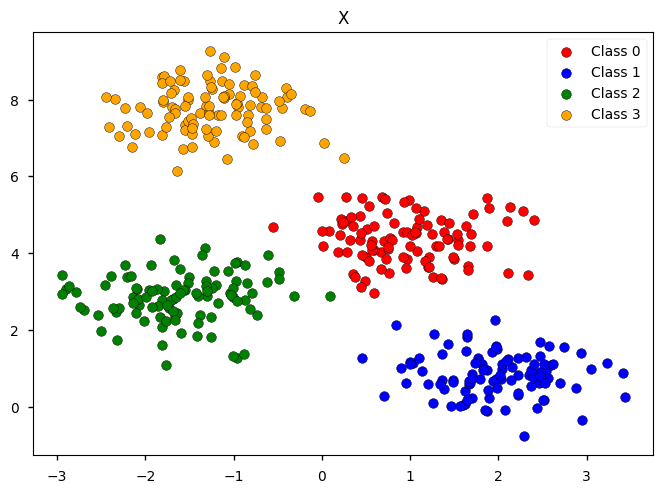

In [12]:
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("X")
plt.show()

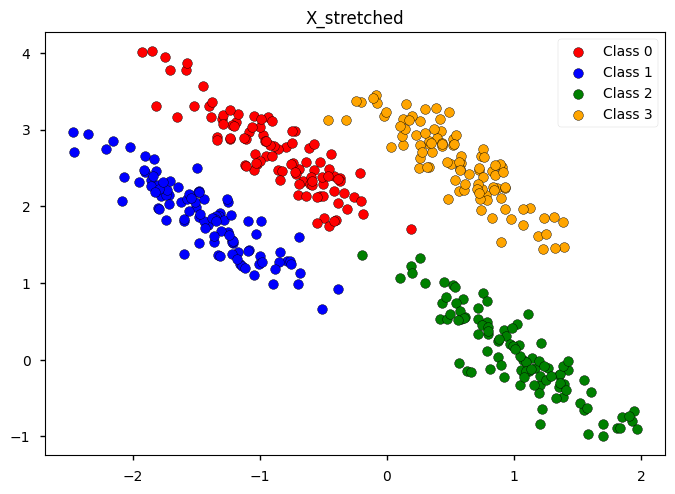

In [13]:
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("X_stretched")
plt.show()

Розбиття даних на навчальний та тестовий набори

In [14]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, y_true, test_size=0.2)
train_data_stretched, test_data_stretched, train_labels_stretched, test_labels_stretched = model_selection.train_test_split(X_stretched, y_true, test_size=0.2)

In [15]:
train_data.shape

(320, 2)

In [16]:
test_data.shape

(80, 2)

In [17]:
train_labels.shape

(320,)

In [18]:
test_labels.shape

(80,)

Побудова моделі 1 для даних Х з пошуком оптимального hidden_layer_sizes

In [19]:
i = 1
model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
model.fit(train_data, train_labels)
while i <= 100 and model.score(test_data, test_labels) < 0.9:
    model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
    model.fit(train_data, train_labels)
    i += 1

In [20]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 5,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [21]:
model.predict(test_data)

array([2, 3, 2, 1, 2, 3, 2, 3, 3, 3, 0, 1, 2, 3, 3, 0, 3, 3, 1, 3, 2, 2,
       3, 0, 1, 2, 1, 1, 3, 3, 2, 2, 3, 3, 2, 1, 1, 1, 1, 1, 2, 0, 3, 3,
       1, 0, 3, 0, 3, 0, 0, 2, 3, 3, 0, 3, 3, 0, 0, 0, 2, 1, 3, 1, 2, 3,
       3, 1, 3, 1, 3, 1, 1, 1, 0, 3, 3, 0, 2, 0])

In [22]:
test_labels

array([2, 3, 2, 1, 2, 3, 2, 3, 3, 3, 0, 1, 2, 3, 3, 0, 3, 3, 0, 3, 2, 2,
       3, 0, 1, 2, 1, 1, 3, 3, 2, 2, 3, 3, 2, 1, 1, 1, 1, 1, 2, 0, 3, 3,
       1, 0, 3, 0, 3, 0, 0, 2, 3, 3, 0, 2, 3, 0, 0, 0, 2, 1, 3, 1, 2, 3,
       3, 1, 2, 1, 3, 1, 1, 1, 0, 3, 3, 0, 2, 0])

In [23]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 77 прикладів з 80


Перенавчання відсутнє

Імовірності потрапляння в кожен з класів:

In [24]:
model.predict_proba(test_data)

array([[6.92534279e-02, 1.71091206e-03, 6.87690916e-01, 2.41344744e-01],
       [5.67807339e-02, 5.97541072e-05, 1.96917561e-01, 7.46241951e-01],
       [1.38861521e-01, 4.72041100e-03, 5.26831565e-01, 3.29586503e-01],
       [1.59738113e-01, 8.33263035e-01, 1.98674058e-03, 5.01211181e-03],
       [3.47308761e-02, 3.53299440e-04, 6.99868837e-01, 2.65046988e-01],
       [7.01387789e-02, 1.12710944e-04, 2.14732426e-01, 7.15016084e-01],
       [6.90850358e-02, 9.31279383e-04, 5.88039531e-01, 3.41944154e-01],
       [1.96719654e-01, 6.76070681e-04, 8.70554909e-02, 7.15548784e-01],
       [8.29281823e-02, 1.95922949e-04, 2.36437348e-01, 6.80438546e-01],
       [7.34241109e-02, 1.13726134e-04, 1.97031890e-01, 7.29430273e-01],
       [5.44632883e-01, 2.85026741e-02, 7.89735799e-02, 3.47890863e-01],
       [2.57612980e-01, 7.28095863e-01, 3.81580795e-03, 1.04753491e-02],
       [1.18529901e-01, 1.88149934e-03, 4.63360151e-01, 4.16228449e-01],
       [8.17468158e-02, 7.58611513e-05, 1.03209193e

Границі рішень:

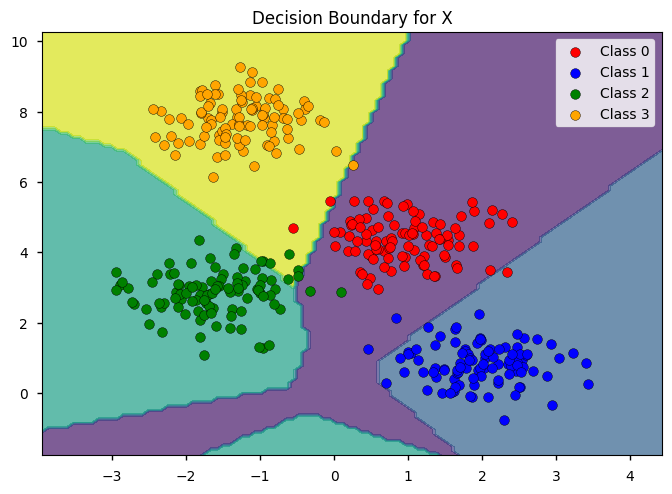

In [25]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X")
plt.show()

Розрахунок критеріїв якості:

In [26]:
metrics.confusion_matrix(test_labels, model.predict(test_data))

array([[15,  1,  0,  0],
       [ 0, 18,  0,  0],
       [ 0,  0, 16,  2],
       [ 0,  0,  0, 28]])

In [27]:
metrics.precision_score(test_labels, model.predict(test_data), average=None)

array([1.        , 0.94736842, 1.        , 0.93333333])

In [28]:
metrics.recall_score(test_labels, model.predict(test_data), average=None)

array([0.9375    , 1.        , 0.88888889, 1.        ])

In [29]:
metrics.f1_score(test_labels, model.predict(test_data), average=None)

array([0.96774194, 0.97297297, 0.94117647, 0.96551724])

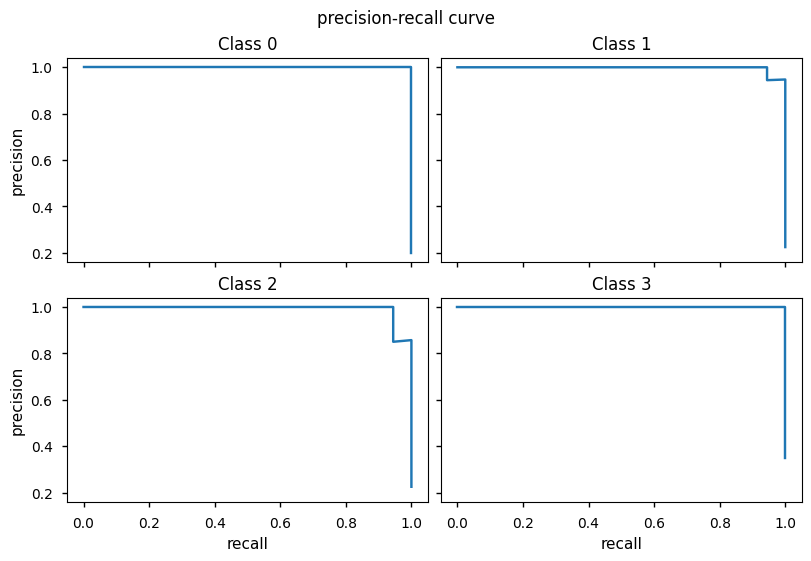

In [30]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 0, model.predict_proba(test_data)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 1, model.predict_proba(test_data)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 2, model.predict_proba(test_data)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels == 3, model.predict_proba(test_data)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

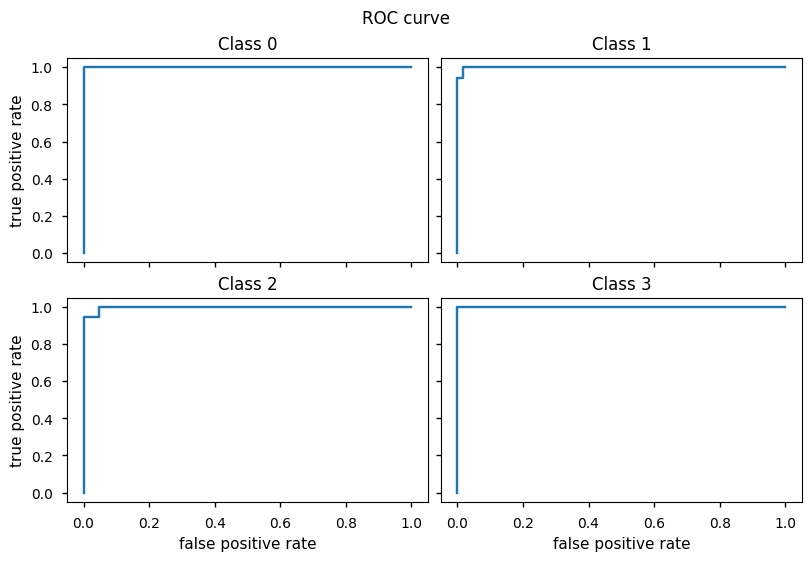

In [31]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 0, model.predict_proba(test_data)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 1, model.predict_proba(test_data)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 2, model.predict_proba(test_data)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels == 3, model.predict_proba(test_data)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [32]:
metrics.roc_auc_score(test_labels, model.predict_proba(test_data), multi_class='ovr', average=None)

array([1.        , 0.99910394, 0.99731183, 1.        ])

Решітчастий пошук для підбору гіперпараметрів:

In [33]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001), 'activation': ("identity", "logistic", "tanh", "relu"), 'solver': ("lbfgs", "sgd", "adam")}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data, train_labels)
grid_search.best_estimator_

MLPClassifier(activation='identity', alpha=0.1, hidden_layer_sizes=5,
              solver='lbfgs')

Навчання моделі на підмножині навчальних даних

In [34]:
model.fit(train_data[:20], train_labels[:20])
model.predict(test_data)

array([3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3,
       0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 3, 3,
       3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0])

In [35]:
test_labels

array([2, 3, 2, 1, 2, 3, 2, 3, 3, 3, 0, 1, 2, 3, 3, 0, 3, 3, 0, 3, 2, 2,
       3, 0, 1, 2, 1, 1, 3, 3, 2, 2, 3, 3, 2, 1, 1, 1, 1, 1, 2, 0, 3, 3,
       1, 0, 3, 0, 3, 0, 0, 2, 3, 3, 0, 2, 3, 0, 0, 0, 2, 1, 3, 1, 2, 3,
       3, 1, 2, 1, 3, 1, 1, 1, 0, 3, 3, 0, 2, 0])

In [36]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 42 прикладів з 80


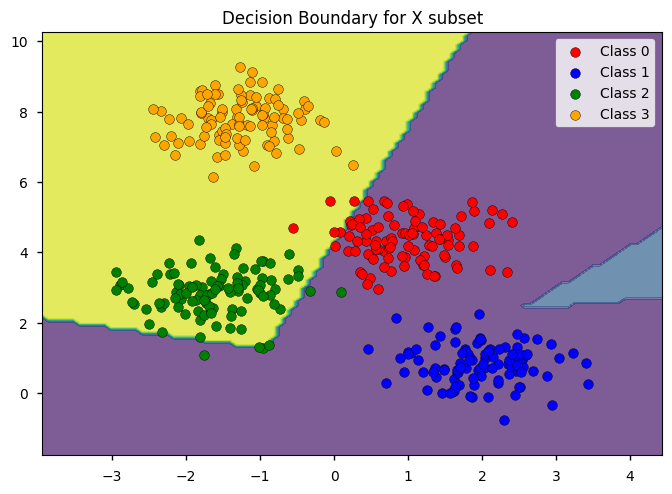

In [37]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][y_true == 0], X[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X[:, 0][y_true == 1], X[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X[:, 0][y_true == 2], X[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X[:, 0][y_true == 3], X[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X subset")
plt.show()

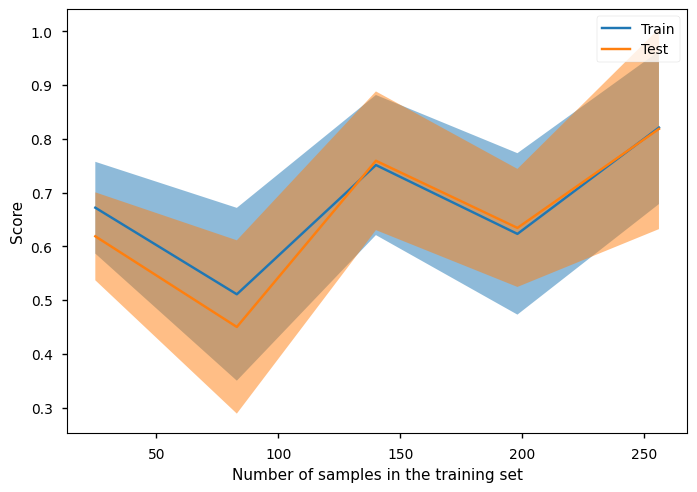

In [38]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data, train_labels)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині є досить гарною моделлю. 

Побудова моделі 2 для даних Х_stretched з таким же hidden_layer_sizes

In [39]:
i -= 1
model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd") 
model.fit(train_data_stretched, train_labels_stretched)

MLPClassifier(hidden_layer_sizes=5, solver='sgd')

In [40]:
model.predict(test_data_stretched)

array([0, 0, 0, 3, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 1, 0, 0, 0, 3, 0, 0, 3, 2, 0, 2, 0, 3,
       2, 0, 3, 3, 0, 3, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 3, 3, 2])

In [41]:
test_labels_stretched

array([0, 0, 0, 3, 3, 2, 3, 0, 1, 3, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0,
       0, 3, 3, 3, 0, 3, 2, 3, 3, 1, 3, 3, 0, 3, 3, 1, 3, 2, 1, 2, 1, 2,
       2, 1, 3, 3, 0, 3, 3, 3, 1, 2, 2, 2, 2, 3, 2, 0, 1, 2, 0, 1, 1, 1,
       3, 3, 3, 2, 1, 0, 3, 3, 1, 2, 3, 3, 3, 2])

In [42]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 43 прикладів з 80


Імовірно присутнє недонавчання

Імовірності потрапляння в кожен з класів:

In [43]:
model.predict_proba(test_data_stretched)

array([[0.35606456, 0.31666462, 0.10627203, 0.22099878],
       [0.41658624, 0.39137983, 0.05480465, 0.13722928],
       [0.39180591, 0.35874514, 0.07570544, 0.17374352],
       [0.26499255, 0.22227776, 0.18948856, 0.32324113],
       [0.36536178, 0.32721176, 0.09823976, 0.2091867 ],
       [0.13012671, 0.15303157, 0.41774993, 0.29909179],
       [0.31244725, 0.26978359, 0.14497875, 0.2727904 ],
       [0.39939888, 0.36834329, 0.06929552, 0.16296231],
       [0.443922  , 0.43498988, 0.03114829, 0.08993983],
       [0.25197216, 0.20972824, 0.20223275, 0.33606684],
       [0.42415996, 0.40231837, 0.04838538, 0.12513629],
       [0.42870297, 0.40920081, 0.04450654, 0.11758968],
       [0.08942452, 0.12546836, 0.57712874, 0.20797838],
       [0.43731027, 0.42313658, 0.03704941, 0.10250374],
       [0.37588285, 0.33945545, 0.08922516, 0.19543654],
       [0.42859838, 0.40903919, 0.04459617, 0.11776626],
       [0.43948693, 0.42690286, 0.03512898, 0.09848122],
       [0.39934107, 0.36826907,

Границі рішень:

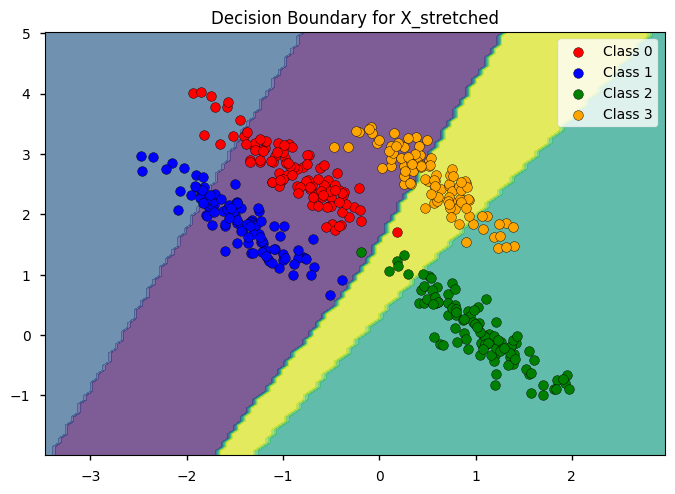

In [44]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched")
plt.show()

Розрахунок критеріїв якості:

In [45]:
metrics.confusion_matrix(test_labels_stretched, model.predict(test_data_stretched))

array([[13,  0,  0,  0],
       [19,  1,  0,  0],
       [ 0,  0, 16,  2],
       [14,  0,  2, 13]])

In [46]:
metrics.precision_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([0.2826087 , 1.        , 0.88888889, 0.86666667])

In [47]:
metrics.recall_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([1.        , 0.05      , 0.88888889, 0.44827586])

In [48]:
metrics.f1_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([0.44067797, 0.0952381 , 0.88888889, 0.59090909])

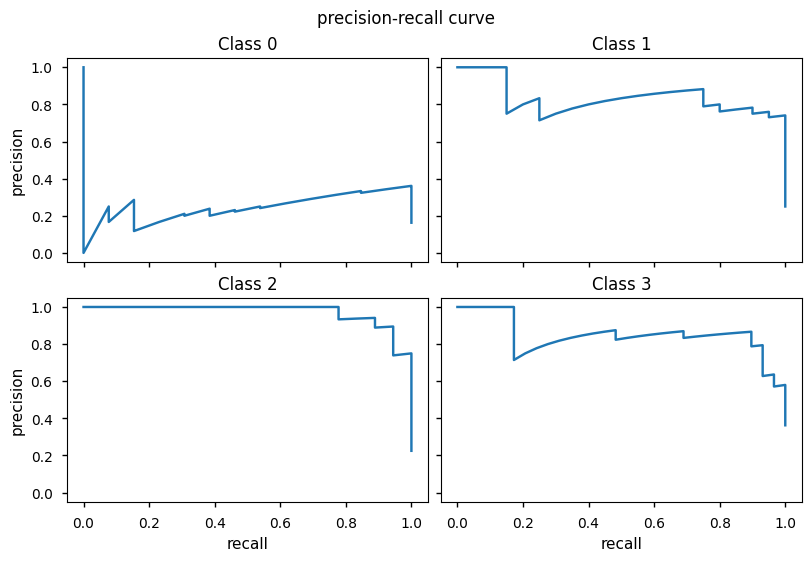

In [49]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

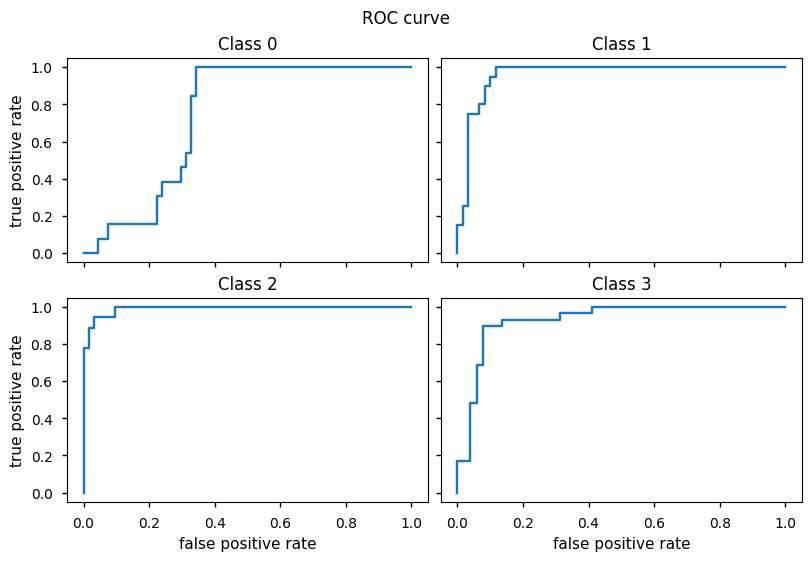

In [50]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [51]:
metrics.roc_auc_score(test_labels_stretched, model.predict_proba(test_data_stretched), multi_class='ovr', average=None)

array([0.73708381, 0.95916667, 0.99103943, 0.92968222])

Решітчастий пошук для підбору гіперпараметрів:

In [52]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001), 'activation': ("identity", "logistic", "tanh", "relu"), 'solver': ("lbfgs", "sgd", "adam")}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_stretched, train_labels_stretched)
grid_search.best_estimator_

MLPClassifier(activation='identity', alpha=1, hidden_layer_sizes=5,
              solver='lbfgs')

Навчання моделі на підмножині навчальних даних

In [53]:
model.fit(train_data_stretched[:20], train_labels_stretched[:20])
model.predict(test_data_stretched)

array([1, 1, 1, 0, 1, 3, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 3,
       2, 1, 0, 0, 1, 0, 3, 1, 1, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2])

In [54]:
test_labels_stretched

array([0, 0, 0, 3, 3, 2, 3, 0, 1, 3, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0,
       0, 3, 3, 3, 0, 3, 2, 3, 3, 1, 3, 3, 0, 3, 3, 1, 3, 2, 1, 2, 1, 2,
       2, 1, 3, 3, 0, 3, 3, 3, 1, 2, 2, 2, 2, 3, 2, 0, 1, 2, 0, 1, 1, 1,
       3, 3, 3, 2, 1, 0, 3, 3, 1, 2, 3, 3, 3, 2])

In [55]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 36 прикладів з 80


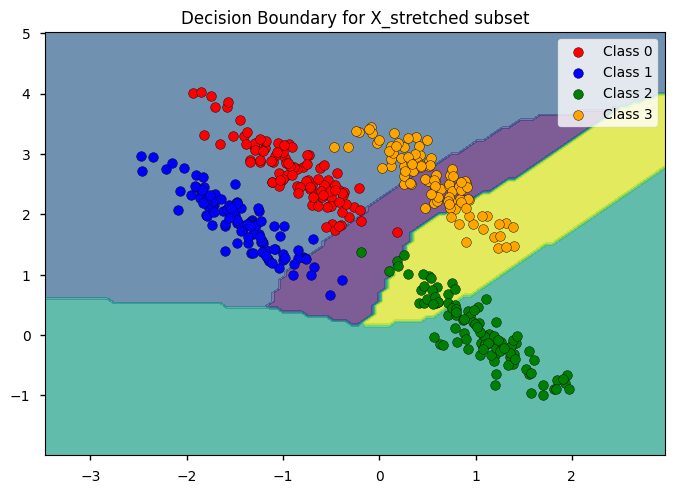

In [56]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched subset")
plt.show()

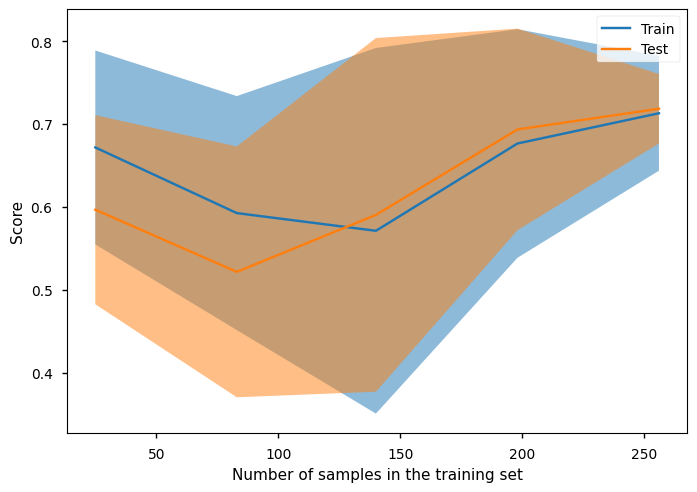

In [57]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_stretched, train_labels_stretched)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить не дуже суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині не є гарною моделлю. 

Побудова моделі 3 для даних Х_stretched з пошуком оптимального hidden_layer_sizes

In [58]:
i = 1
model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
model.fit(train_data_stretched, train_labels_stretched)
while i <= 100 and model.score(test_data_stretched, test_labels_stretched) < 0.9:
    model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
    model.fit(train_data_stretched, train_labels_stretched)
    i += 1

In [59]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 7,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [60]:
model.predict(test_data_stretched)

array([3, 3, 0, 3, 3, 2, 3, 3, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 2, 2, 1, 3,
       0, 3, 3, 3, 0, 3, 2, 3, 3, 1, 3, 3, 0, 3, 3, 1, 3, 2, 1, 2, 1, 3,
       2, 1, 3, 3, 0, 3, 3, 3, 1, 2, 2, 2, 2, 3, 2, 3, 1, 2, 0, 1, 1, 1,
       3, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 2])

In [61]:
test_labels_stretched

array([0, 0, 0, 3, 3, 2, 3, 0, 1, 3, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0,
       0, 3, 3, 3, 0, 3, 2, 3, 3, 1, 3, 3, 0, 3, 3, 1, 3, 2, 1, 2, 1, 2,
       2, 1, 3, 3, 0, 3, 3, 3, 1, 2, 2, 2, 2, 3, 2, 0, 1, 2, 0, 1, 1, 1,
       3, 3, 3, 2, 1, 0, 3, 3, 1, 2, 3, 3, 3, 2])

In [62]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 72 прикладів з 80


Перенавчання відсутнє

Імовірності потрапляння в кожен з класів:

In [63]:
model.predict_proba(test_data_stretched)

array([[0.2728318 , 0.12908765, 0.19171094, 0.4063696 ],
       [0.32611865, 0.15565917, 0.17182763, 0.34639455],
       [0.30765122, 0.20248559, 0.19478658, 0.29507661],
       [0.1658297 , 0.0634517 , 0.19089867, 0.57981992],
       [0.25881138, 0.08212139, 0.15712931, 0.50193791],
       [0.14330325, 0.15846811, 0.42001272, 0.27821592],
       [0.20234746, 0.06975838, 0.17386587, 0.55402828],
       [0.32133119, 0.16874979, 0.17881082, 0.33110819],
       [0.24424391, 0.33492486, 0.23528719, 0.18554404],
       [0.16146892, 0.07050121, 0.21053692, 0.55749294],
       [0.24600522, 0.3314542 , 0.23461079, 0.18792979],
       [0.23723416, 0.34869071, 0.23778513, 0.17628999],
       [0.10012179, 0.1240974 , 0.5444306 , 0.2313502 ],
       [0.25955   , 0.30455621, 0.22871762, 0.20717618],
       [0.31286338, 0.18321046, 0.1877539 , 0.31617225],
       [0.25760175, 0.30845151, 0.22964354, 0.20430321],
       [0.23723416, 0.34869071, 0.23778513, 0.17628999],
       [0.24628733, 0.33089783,

Границі рішень:

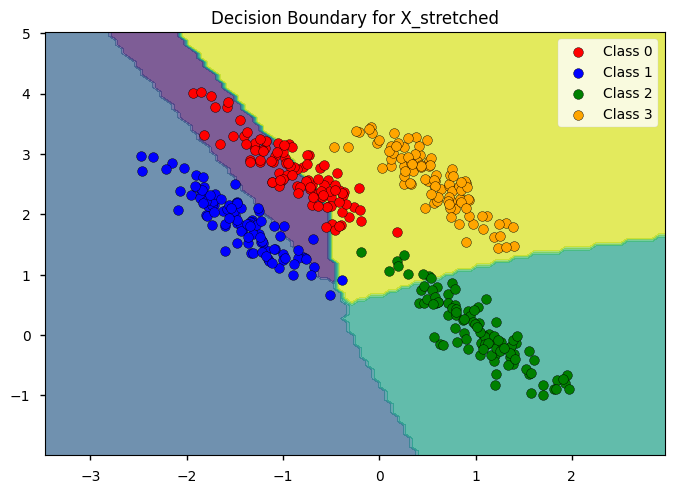

In [64]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched")
plt.show()

Розрахунок критеріїв якості:

In [65]:
metrics.confusion_matrix(test_labels_stretched, model.predict(test_data_stretched))

array([[ 7,  0,  0,  6],
       [ 0, 20,  0,  0],
       [ 0,  0, 16,  2],
       [ 0,  0,  0, 29]])

In [66]:
metrics.precision_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([1.        , 1.        , 1.        , 0.78378378])

In [67]:
metrics.recall_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([0.53846154, 1.        , 0.88888889, 1.        ])

In [68]:
metrics.f1_score(test_labels_stretched, model.predict(test_data_stretched), average=None)

array([0.7       , 1.        , 0.94117647, 0.87878788])

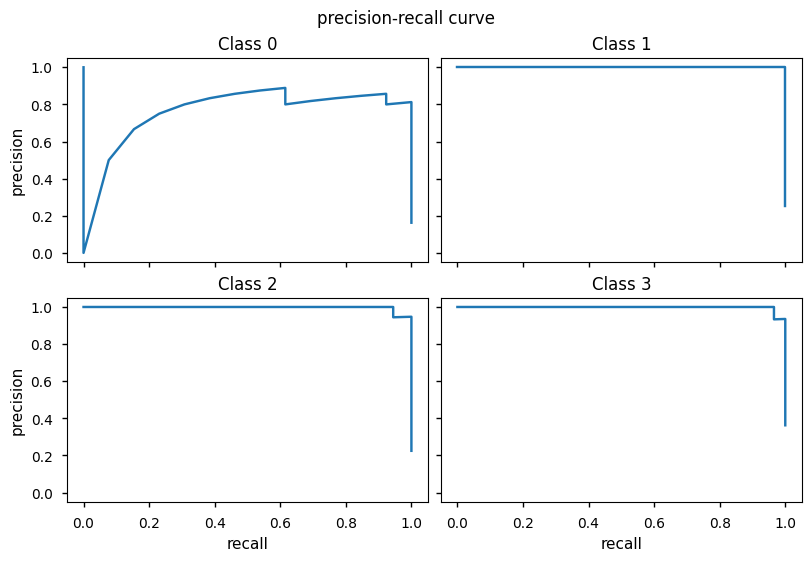

In [69]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(recall, precision)
ax0.set_title("Class 0")
ax0.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(recall, precision)
ax1.set_title("Class 1")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(recall, precision)
ax2.set_title("Class 2")
ax2.set_xlabel("recall")
ax2.set_ylabel("precision")
precision, recall, threshhold = metrics.precision_recall_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(recall, precision)
ax3.set_title("Class 3")
ax3.set_xlabel("recall")
fig.suptitle("precision-recall curve")
plt.show()

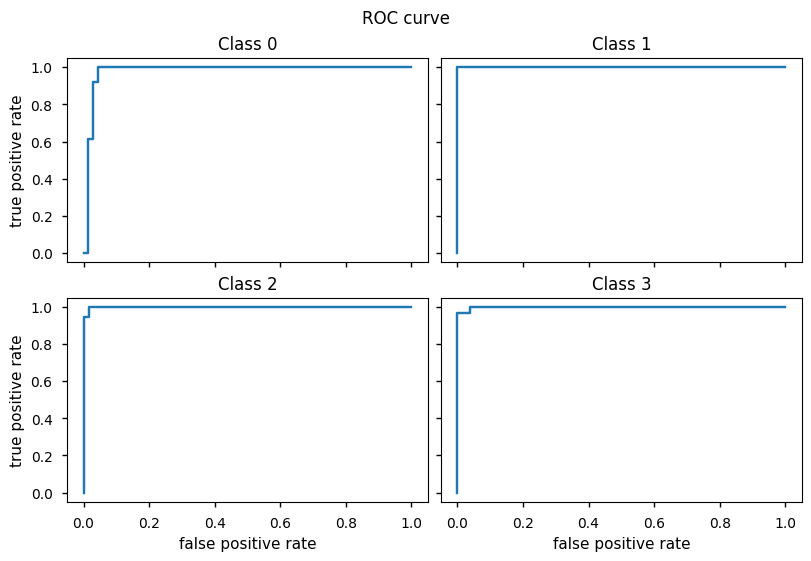

In [70]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 0, model.predict_proba(test_data_stretched)[:, 0])
ax0.plot(fpr, tpr)
ax0.set_title("Class 0")
ax0.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 1, model.predict_proba(test_data_stretched)[:, 1])
ax1.plot(fpr, tpr)
ax1.set_title("Class 1")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 2, model.predict_proba(test_data_stretched)[:, 2])
ax2.plot(fpr, tpr)
ax2.set_title("Class 2")
ax2.set_xlabel("false positive rate")
ax2.set_ylabel("true positive rate")
fpr, tpr, threshhold = metrics.roc_curve(test_labels_stretched == 3, model.predict_proba(test_data_stretched)[:, 3])
ax3.plot(fpr, tpr)
ax3.set_title("Class 3")
ax3.set_xlabel("false positive rate")
fig.suptitle("ROC curve")
plt.show()

In [71]:
metrics.roc_auc_score(test_labels_stretched, model.predict_proba(test_data_stretched), multi_class='ovr', average=None)

array([0.97818599, 1.        , 0.99910394, 0.99864773])

Решітчастий пошук для підбору гіперпараметрів:

In [72]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001), 'activation': ("identity", "logistic", "tanh", "relu"), 'solver': ("lbfgs", "sgd", "adam")}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data_stretched, train_labels_stretched)
grid_search.best_estimator_

MLPClassifier(activation='identity', alpha=1, hidden_layer_sizes=7,
              solver='lbfgs')

Навчання моделі на підмножині навчальних даних

In [73]:
model.fit(train_data_stretched[:20], train_labels_stretched[:20])
model.predict(test_data_stretched)

array([1, 1, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 3, 1, 3, 1, 3, 2, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 2, 1, 2, 1, 1,
       2, 1, 3, 3, 1, 3, 3, 1, 1, 2, 2, 2, 3, 3, 2, 1, 1, 2, 1, 1, 1, 1,
       3, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 3, 2])

In [74]:
test_labels_stretched

array([0, 0, 0, 3, 3, 2, 3, 0, 1, 3, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0,
       0, 3, 3, 3, 0, 3, 2, 3, 3, 1, 3, 3, 0, 3, 3, 1, 3, 2, 1, 2, 1, 2,
       2, 1, 3, 3, 0, 3, 3, 3, 1, 2, 2, 2, 2, 3, 2, 0, 1, 2, 0, 1, 1, 1,
       3, 3, 3, 2, 1, 0, 3, 3, 1, 2, 3, 3, 3, 2])

In [75]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels_stretched == model.predict(test_data_stretched))} прикладів з {len(test_labels_stretched)}')

Правильно класифіковано 53 прикладів з 80


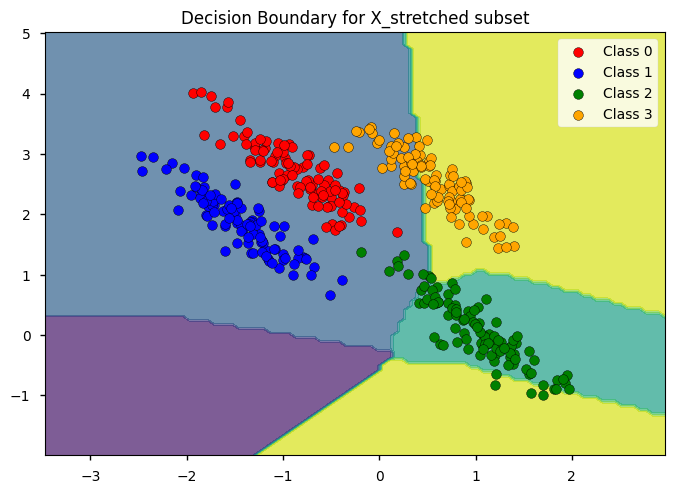

In [76]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data_stretched, response_method='predict', alpha=0.7)
plt.scatter(X_stretched[:, 0][y_true == 0], X_stretched[:, 1][y_true == 0], c='r', edgecolors='black', label='Class 0')
plt.scatter(X_stretched[:, 0][y_true == 1], X_stretched[:, 1][y_true == 1], c='b', edgecolors='black', label='Class 1')
plt.scatter(X_stretched[:, 0][y_true == 2], X_stretched[:, 1][y_true == 2], c='g', edgecolors='black', label='Class 2')
plt.scatter(X_stretched[:, 0][y_true == 3], X_stretched[:, 1][y_true == 3], c='orange', edgecolors='black', label='Class 3')
plt.legend()
plt.title("Decision Boundary for X_stretched subset")
plt.show()

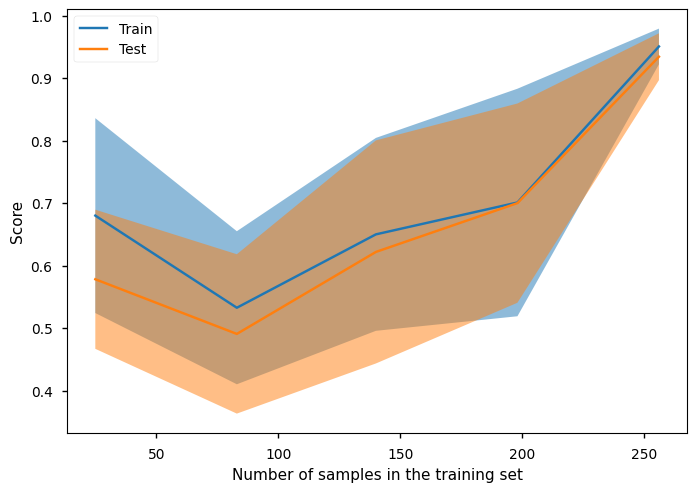

In [77]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data_stretched, train_labels_stretched)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині є прийнятною. 

### Набір даних (б)

In [78]:
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

Візуалізація даних

In [79]:
np.unique(Y)

array([False,  True])

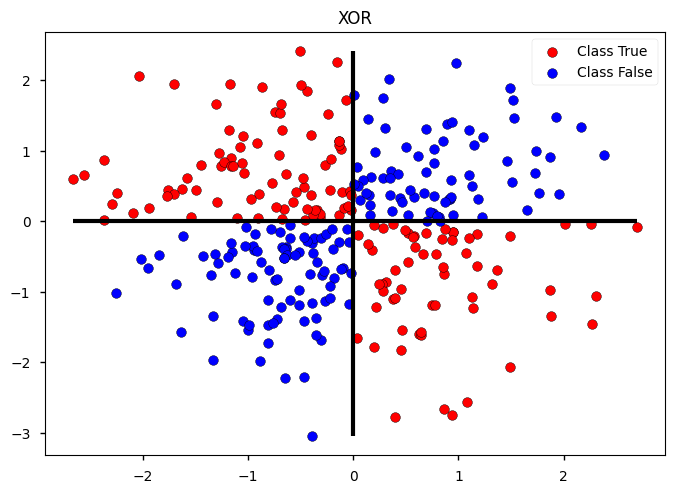

In [80]:
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.vlines(0, ymin=X[:, 1].min(), ymax=X[:, 1].max(), linewidth=3, colors='black')
plt.hlines(0, xmin=X[:, 0].min(), xmax=X[:, 0].max(), linewidth=3, colors='black')
plt.legend()
plt.title("XOR")
plt.show()

Розбиття даних на навчальний та тестовий набори

In [81]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, Y, test_size=0.2)

In [82]:
train_data.shape

(240, 2)

In [83]:
test_data.shape

(60, 2)

In [84]:
train_labels.shape

(240,)

In [85]:
test_labels.shape

(60,)

In [86]:
i = 1
model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
model.fit(train_data, train_labels)
while i <= 100 and model.score(test_data, test_labels) < 0.9:
    model = MLPClassifier(hidden_layer_sizes=i, activation="relu", solver="sgd")
    model.fit(train_data, train_labels)
    i += 1

In [87]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 100,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [88]:
model.predict(test_data)

array([ True,  True, False, False,  True, False,  True, False,  True,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False])

In [89]:
test_labels

array([ True, False, False,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False,  True,  True])

In [90]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 47 прикладів з 60


Імовірності потрапляння в кожен з класів:

In [91]:
model.predict_proba(test_data)

array([[0.48658178, 0.51341822],
       [0.49077209, 0.50922791],
       [0.62069416, 0.37930584],
       [0.53881725, 0.46118275],
       [0.46736905, 0.53263095],
       [0.53161331, 0.46838669],
       [0.38121684, 0.61878316],
       [0.75782483, 0.24217517],
       [0.48580855, 0.51419145],
       [0.54947417, 0.45052583],
       [0.47472201, 0.52527799],
       [0.50997772, 0.49002228],
       [0.55929427, 0.44070573],
       [0.44852455, 0.55147545],
       [0.51272267, 0.48727733],
       [0.4453938 , 0.5546062 ],
       [0.64201815, 0.35798185],
       [0.50364068, 0.49635932],
       [0.62848652, 0.37151348],
       [0.48426811, 0.51573189],
       [0.52465273, 0.47534727],
       [0.60307041, 0.39692959],
       [0.595094  , 0.404906  ],
       [0.40801515, 0.59198485],
       [0.64221098, 0.35778902],
       [0.52361094, 0.47638906],
       [0.53469835, 0.46530165],
       [0.61193394, 0.38806606],
       [0.51925147, 0.48074853],
       [0.53462256, 0.46537744],
       [0.

Границі рішень:

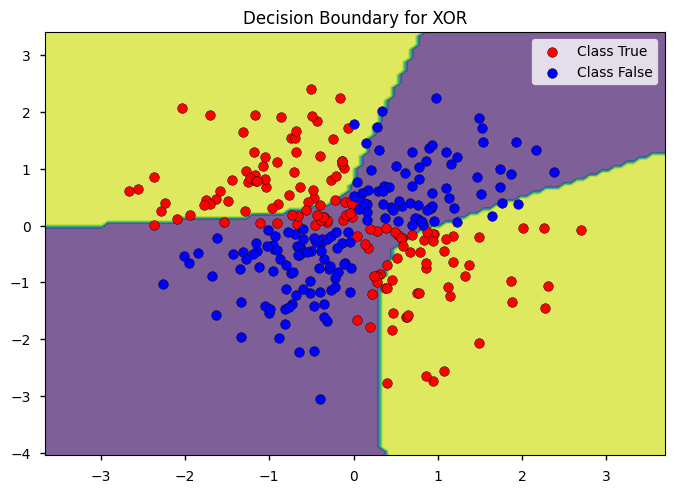

In [92]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR")
plt.show()

Розрахунок критеріїв якості:

In [93]:
metrics.confusion_matrix(test_labels, model.predict(test_data))

array([[30,  1],
       [12, 17]])

In [94]:
metrics.precision_score(test_labels, model.predict(test_data))

0.9444444444444444

In [95]:
metrics.recall_score(test_labels, model.predict(test_data))

0.5862068965517241

In [96]:
metrics.f1_score(test_labels, model.predict(test_data))

0.7234042553191489

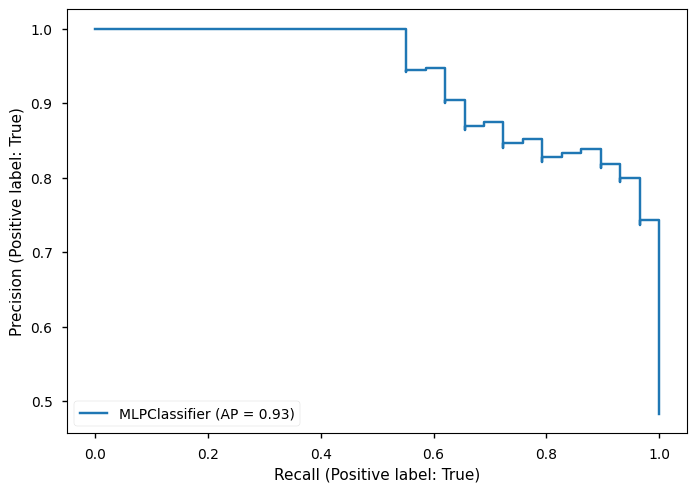

In [97]:
metrics.PrecisionRecallDisplay.from_estimator(model, test_data, test_labels)
plt.show()

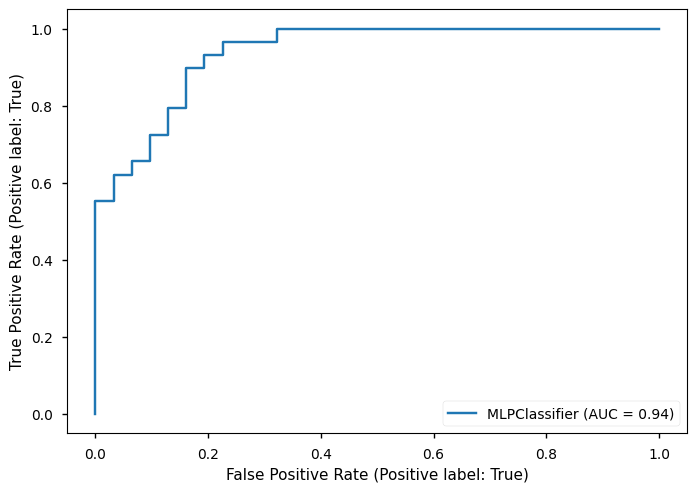

In [98]:
metrics.RocCurveDisplay.from_estimator(model, test_data, test_labels)
plt.show()

In [99]:
metrics.roc_auc_score(test_labels, model.predict(test_data))

0.7769744160177976

Решітчастий пошук для підбору гіперпараметрів:

In [100]:
parameters = {'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001), 'activation': ("identity", "logistic", "tanh", "relu"), 'solver': ("lbfgs", "sgd", "adam")}  
grid_search = model_selection.GridSearchCV(model, parameters)
grid_search.fit(train_data, train_labels)
grid_search.best_estimator_

MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=100,
              solver='lbfgs')

Навчання моделі на підмножині навчальних даних

In [101]:
model.fit(train_data[:20], train_labels[:20])
model.predict(test_data)

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False,  True, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [102]:
test_labels

array([ True, False, False,  True,  True, False,  True, False,  True,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False,  True,  True])

In [103]:
print(f'Правильно класифіковано {np.count_nonzero(test_labels == model.predict(test_data))} прикладів з {len(test_labels)}')

Правильно класифіковано 41 прикладів з 60


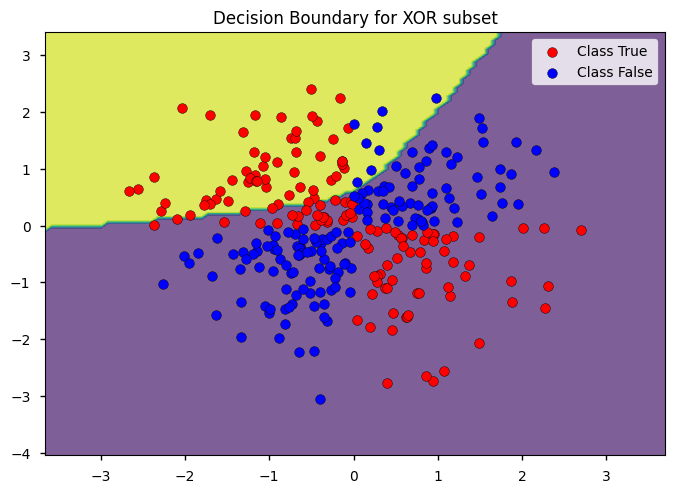

In [104]:
boundary = DecisionBoundaryDisplay.from_estimator(model, train_data, response_method='predict', alpha=0.7)
plt.scatter(X[:, 0][Y == True], X[:, 1][Y == True], c='r', edgecolors="black", label="Class True")
plt.scatter(X[:, 0][Y == False], X[:, 1][Y == False], c='b', edgecolors="black", label="Class False")
plt.legend()
plt.title("Decision Boundary for XOR subset")
plt.show()

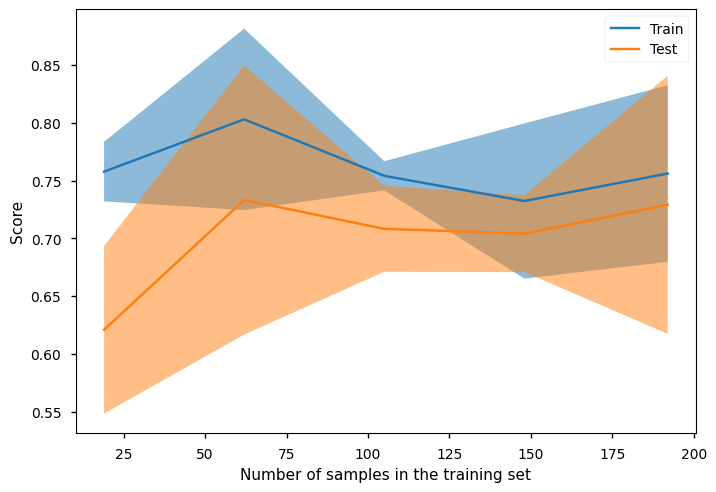

In [105]:
model_selection.LearningCurveDisplay.from_estimator(model, train_data, train_labels)
plt.show()

Отже, від розміру навчальної множини якість моделі залежить суттєво. Врахувавши значення критеріїв якості, побудована модель на повній множині є прийнятною. 